## Introduktion til Sandsynlighed og Statistik
## Opgave

I denne opgave vil vi bruge datasættet med diabetespatienter hentet [herfra](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/diabetes.tsv",sep='\t')
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

I dette datasæt er kolonnerne som følger:  
* Alder og køn er selvforklarende  
* BMI er body mass index  
* BP er gennemsnitligt blodtryk  
* S1 til S6 er forskellige blodmålinger  
* Y er det kvalitative mål for sygdomsprogression over et år  

Lad os undersøge dette datasæt ved hjælp af sandsynligheds- og statistikmetoder.

### Opgave 1: Beregn gennemsnitsværdier og varians for alle værdier  


In [5]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [8]:
# Another way
pd.DataFrame([df.mean(),df.var()],index=['Mean','Variance']).head()

AGE       SEX        BMI          BP           S1          S2  \
Mean       48.51810  1.468326  26.375792   94.647014   189.140271  115.439140   
Variance  171.84661  0.249561  19.519798  191.304401  1197.717241  924.955494   

                  S3        S4        S5          S6            Y  
Mean       49.788462  4.070249  4.641411   91.260181   152.133484  
Variance  167.293585  1.665261  0.272892  132.165712  5943.331348

In [9]:
# Or, more simply, for the mean (variance can be done similarly)
df.mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

### Opgave 2: Plot boksdiagrammer for BMI, BP og Y afhængigt af køn


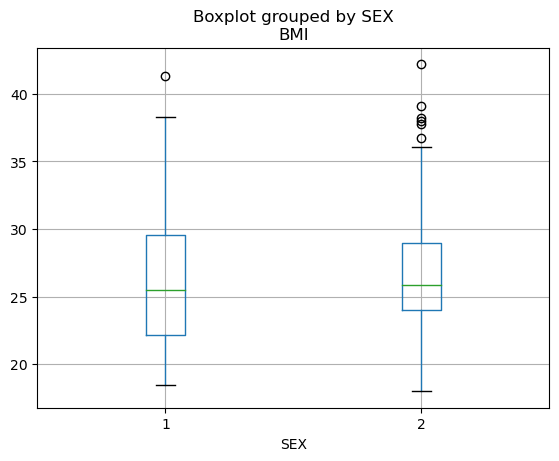

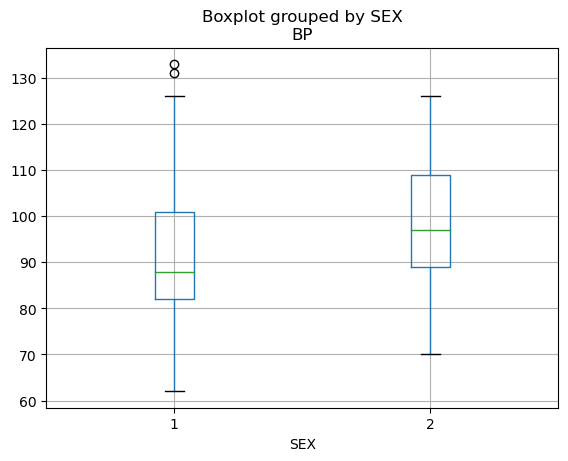

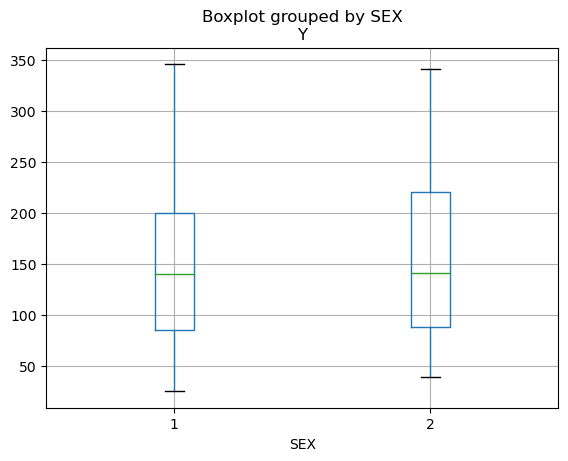

In [17]:
for col in ['BMI','BP','Y']:
    df.boxplot(column=col,by='SEX')
plt.show()

### Opgave 3: Hvad er fordelingen af Alder, Køn, BMI og Y-variabler?


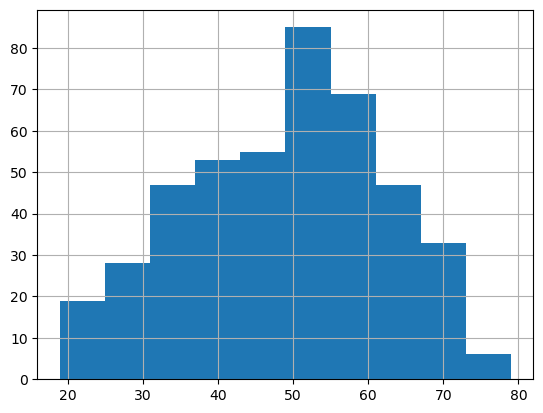

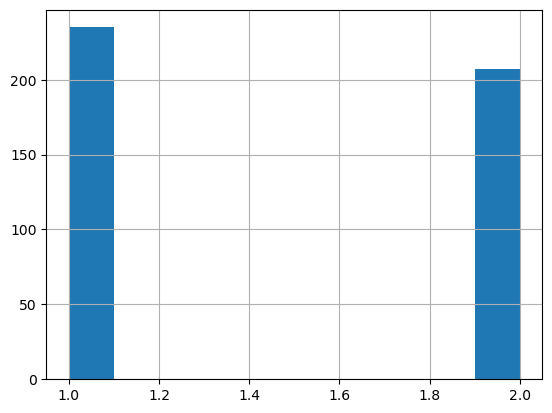

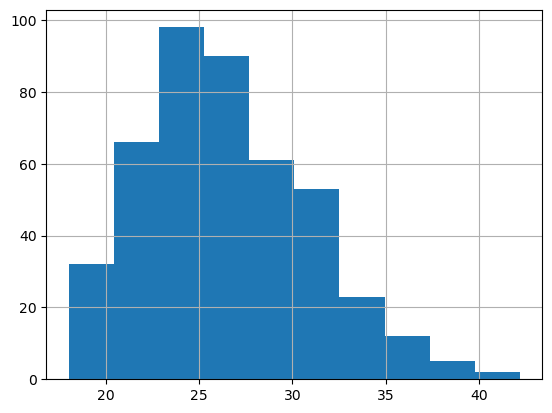

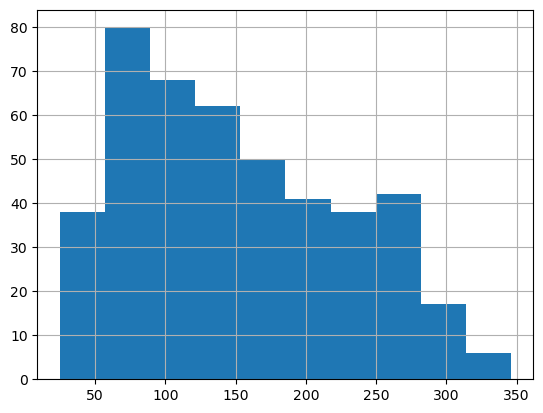

In [19]:
for col in ['AGE','SEX','BMI','Y']:
    df[col].hist()
    plt.show()

Konklusioner:
* Alder - normal
* Køn - ensartet
* BMI, Y - svært at vurdere


### Opgave 4: Test korrelationen mellem forskellige variabler og sygdomsprogression (Y)

> **Tip** Korrelationsmatrixen vil give dig den mest nyttige information om, hvilke værdier der er afhængige.


In [20]:
df.corr()

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

Konklusion:
* Den stærkeste korrelation med Y er BMI og S5 (blodsukker). Dette virker rimeligt.


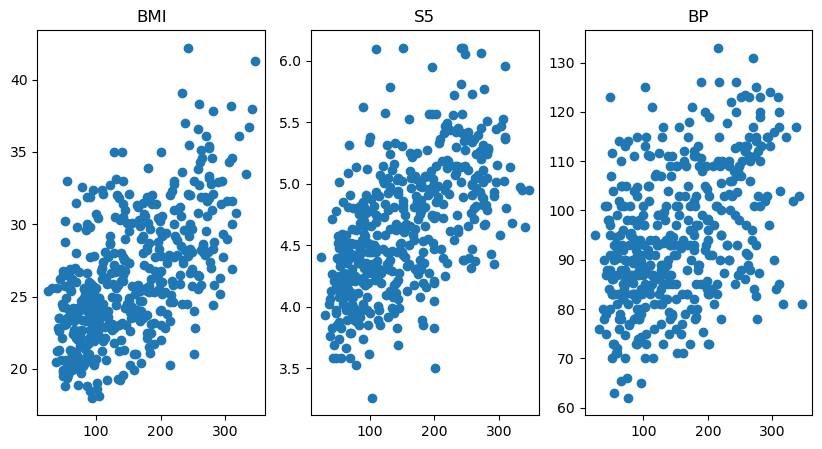

In [26]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()

In [27]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975



---

**Ansvarsfraskrivelse**:  
Dette dokument er blevet oversat ved hjælp af AI-oversættelsestjenesten [Co-op Translator](https://github.com/Azure/co-op-translator). Selvom vi bestræber os på nøjagtighed, skal du være opmærksom på, at automatiserede oversættelser kan indeholde fejl eller unøjagtigheder. Det originale dokument på dets oprindelige sprog bør betragtes som den autoritative kilde. For kritisk information anbefales professionel menneskelig oversættelse. Vi påtager os ikke ansvar for eventuelle misforståelser eller fejltolkninger, der opstår som følge af brugen af denne oversættelse.
